In [2]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [130]:
darkorange = ["#662089"]
blue = ["#1B4882"]
green = ["#086361"]
inset_color1 = ["#ffac00"]
inset_color2 = ["#61a842"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        inset_color1.append(colors.get_alpha_hex(inset_color1[0],beta[i]))
        inset_color2.append(colors.get_alpha_hex(inset_color2[0],beta[i]))

In [1]:
Hm_ED = [1.5122333560758745, 1.4447136194375652, 1.3525504941552033, 1.2353135616779642, 0.9685465334568405, 0.7368592485917179]
Hn_ED = [1.5829747351979706, 1.6176026159962207, 1.643362450406913, 1.652910184633734, 1.6101388551060534, 1.5197381825461511]
Hm2_ED = [1.4921803715452804, 1.3674749807874804, 1.1892808304275877, 0.9648889870028056, 0.5613882960741249, 0.3343877079946581]
Hn2_ED = [1.4897271956583682, 1.507098710649877, 1.5206058210510056, 1.489624232791233, 1.3056012570938567, 1.1536898489192695]
Pn2_Um1_ED = [3.20654097e-65, 8.58090945e-64, 1.58535081e-04, 2.28731285e-03,1.72686335e-02, 7.68468121e-02, 2.17658339e-01, 3.64099052e-01,3.21681315e-01]
Pn2_Um4_ED = [3.66461458e-65, 5.46736263e-64, 5.88142470e-04, 1.68230832e-03,4.89524293e-02, 5.20002298e-02, 4.10478182e-01, 1.18663287e-01,3.67635421e-01]
Pn2_Um8_ED = [4.49041738e-65, 4.69033284e-64, 3.55644568e-04, 1.22712986e-04, 8.45221942e-02, 6.97843720e-03, 7.02982601e-01, 9.03406224e-03, 1.96004348e-01]
Pm2_Um1_ED = [3.20654097e-65, 2.13685094e-03, 3.69446291e-02, 2.19479738e-01, 4.82877565e-01, 2.19479738e-01, 3.69446291e-02, 2.13685094e-03, 3.20654097e-65]
Pm2_Um2_ED = [3.78006003e-65, 8.42847122e-04, 2.16251084e-02, 1.88965157e-01, 5.77133775e-01, 1.88965157e-01, 2.16251084e-02, 8.42847122e-04, 3.78006003e-65]
Pm2_Um4_ED = [3.66461458e-65, 4.29484519e-05, 3.23611159e-03, 8.61299643e-02, 8.21181951e-01, 8.61299643e-02, 3.23611159e-03, 4.29484519e-05, 3.66461458e-65]
Pm2_Um6_ED = [4.56220606e-65, 9.20954729e-07, 2.54218638e-04, 2.49237029e-02, 9.49642315e-01, 2.49237029e-02, 2.54218638e-04, 9.20954729e-07, 4.56220606e-65]
Pm2_Um8_ED = [5.51972145e-65, 2.71889604e-08, 2.57075388e-05, 8.06757902e-03, 9.83813372e-01, 8.06757902e-03, 2.57075388e-05, 2.71889604e-08, 5.51972145e-65]

In [126]:
QMC_file = h5py.File("../data/processed_data/test.jld")

U_list = abs(QMC_file['U'][:])

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Pn2_avg'][0, :]['re_'], QMC_file['Pn2_err'][0, :]['re_'])]
Pn2_Um1_avg = [yi.n for yi in tmp]
Pn2_Um1_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Pn2_avg'][3, :]['re_'], QMC_file['Pn2_err'][3, :]['re_'])]
Pn2_Um4_avg = [yi.n for yi in tmp]
Pn2_Um4_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Pn2_avg'][5, :]['re_'], QMC_file['Pn2_err'][5, :]['re_'])]
Pn2_Um8_avg = [yi.n for yi in tmp]
Pn2_Um8_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Pm2_avg'][0, :]['re_'], QMC_file['Pm2_err'][0, :]['re_'])]
Pm2_Um1_avg = [yi.n for yi in tmp]
Pm2_Um1_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Pm2_avg'][3, :]['re_'], QMC_file['Pm2_err'][3, :]['re_'])]
Pm2_Um4_avg = [yi.n for yi in tmp]
Pm2_Um4_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Pm2_avg'][5, :]['re_'], QMC_file['Pm2_err'][5, :]['re_'])]
Pm2_Um8_avg = [yi.n for yi in tmp]
Pm2_Um8_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Hn2_avg'][:]['re_'], QMC_file['Hn2_err'][:]['re_'])]
Hn2_avg = [yi.n for yi in tmp]
Hn2_err = [yi.s for yi in tmp]

tmp = [ufloat(n, u) for n, u in zip(QMC_file['Hm2_avg'][:]['re_'], QMC_file['Hm2_err'][:]['re_'])]
Hm2_avg = [yi.n for yi in tmp]
Hm2_err = [yi.s for yi in tmp]

C:\Users\tongs\AppData\Local\Temp\ipykernel_7208\3596777489.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


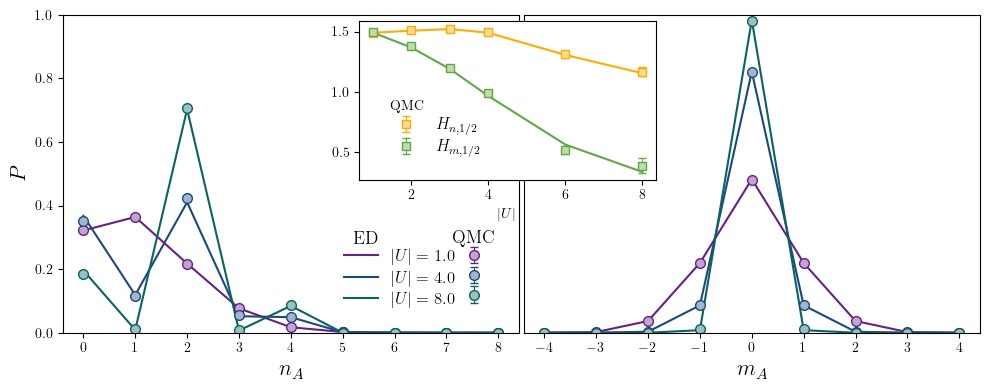

In [207]:
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,0.01,1], wspace=0.00)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax1.plot(
        range(9), Pn2_Um1_ED[::-1],
        color=darkorange[0], label=r'$|U|=1.0$'
)
ax1.errorbar(
        range(9), Pn2_Um1_avg , yerr=Pn2_Um1_err,
        fmt='o', linestyle='', color=darkorange[0], markerfacecolor=darkorange[4],
        linewidth=0.8, elinewidth=0.8, capsize=3, markersize=7, label=' '
)

ax1.plot(
        range(9), Pn2_Um4_ED[::-1],
        color=blue[0], label=r'$|U|=4.0$'
)
ax1.errorbar(
        range(9), Pn2_Um4_avg , yerr=Pn2_Um4_err,
        fmt='o', linestyle='', color=blue[0], markerfacecolor=blue[4],
        linewidth=0.8, elinewidth=0.8, capsize=3, markersize=7, label=' '
)

ax1.plot(
        range(9), Pn2_Um8_ED[::-1],
        color=green[0], label=r'$|U|=8.0$'
)
ax1.errorbar(
        range(9), Pn2_Um8_avg , yerr=Pn2_Um8_err,
        fmt='o', linestyle='', color=green[0], markerfacecolor=green[4],
        linewidth=0.8, elinewidth=0.8, capsize=3, markersize=7, label=' '
)

ax2.plot(
        range(-4,5), Pm2_Um1_ED[::-1],
        color=darkorange[0]
)
ax2.errorbar(
        range(-4,5), Pm2_Um1_avg , yerr=Pm2_Um1_err,
        fmt='o', linestyle='', color=darkorange[0], markerfacecolor=darkorange[4],
        linewidth=0.8, elinewidth=0.8, capsize=3, markersize=7, label=' '
)

ax2.plot(
        range(-4,5), Pm2_Um4_ED[::-1],
        color=blue[0]
)
ax2.errorbar(
        range(-4,5), Pm2_Um4_avg , yerr=Pm2_Um4_err,
        fmt='o', linestyle='', color=blue[0], markerfacecolor=blue[4],
        linewidth=0.8, elinewidth=0.8, capsize=3, markersize=7
)

ax2.plot(
        range(-4,5), Pm2_Um8_ED[::-1],
        color=green[0]
)
ax2.errorbar(
        range(-4,5), Pm2_Um8_avg , yerr=Pm2_Um8_err,
        fmt='o', linestyle='', color=green[0], markerfacecolor=green[4],
        linewidth=0.8, elinewidth=0.8, capsize=3, markersize=7
)

# Create inset figure
def position_inset(base_ax, inset, x, y, width, height):
    def inset_locator(ax, renderer):
        bbox = base_ax.get_position()
        return [bbox.x0 + x*bbox.width, bbox.y0 + y*bbox.height, bbox.width * width, bbox.height * height]
    inset.set_axes_locator(inset_locator)
def create_zoomedin_inset(ax):
        axins = zoomed_inset_axes(ax, zoom=1, loc='upper right')
        position_inset(ax, axins, 0.65, 0.48, 0.65, 0.50)
        #axins.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1.0', '2.0', '3.0', '4.0', '6.0', '8.0'])
        axins.set_xlabel(r"$|U|$")

        return axins
axins = create_zoomedin_inset(ax1)
axins.plot(U_list, Hn2_ED, color=inset_color1[0])
axins.errorbar(U_list, Hn2_avg , yerr=Hn2_err, fmt='s', color=inset_color1[0], markerfacecolor=inset_color1[4], linewidth=0.8, elinewidth=0.8, markersize=6, capsize=3, label=r'$H_{n, 1/2}$')
axins.plot(U_list, Hm2_ED, color=inset_color2[0])
axins.errorbar(U_list, Hm2_avg , yerr=Hm2_err, fmt='s', color=inset_color2[0], markerfacecolor=inset_color2[4], linewidth=0.8, elinewidth=0.8, markersize=6, capsize=3, label=r'$H_{m, 1/2}$')

# Adding legend
legend_parameters = {'frameon':False, 'labelspacing':0.3, 'columnspacing':0.1, 'fontsize':12}
ax1.legend(**legend_parameters, ncol=2, loc='lower right', bbox_to_anchor=(1.0, 0.03))
axins.legend(**legend_parameters, ncol=1, loc='lower left', bbox_to_anchor=(0.05, 0.05))
ax1.annotate('ED', (5.2, 0.28), fontsize=13)
ax1.annotate('QMC', (7.1, 0.28), fontsize=13)

axins.annotate('QMC', (1.45, 0.85))

ax1.set_ylim([0,1])
ax1.set_xlabel(r"$n_A$", fontsize=16)
ax1.set_ylabel(r"$P$", fontsize=16)
ax2.set_ylim([0,1])
ax2.set_xlabel(r"$m_A$", fontsize=16)
ax2.set_yticks([])

plt.tight_layout()

In [209]:
fig.savefig("../figures/ED_benchmark_Lx4Ly3.pdf")
fig.savefig("../figures/ED_benchmark_Lx4Ly3.svg")